# Environment Benchmark - pybatchrender


 ## 1. Setup

Install Nvidia GL lib, clone the repository, and install dependencies.

In [1]:
# Install NVIDIA OpenGL libraries required for CUDA-OpenGL interop in Colab
!apt-get update -qq
!apt-get install -y --no-install-recommends libnvidia-gl-550

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libnvidia-common-550 libnvidia-compute-550
The following NEW packages will be installed:
  libnvidia-common-550 libnvidia-compute-550 libnvidia-gl-550
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 185 MB of archives.
After this operation, 562 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libnvidia-common-550 550.163.01-0ubuntu1 [15.6 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  libnvidia-compute-550 550.163.01-0ubuntu1 [49.5 MB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86

In [2]:
# Clone the repository
!git clone https://github.com/dolphin-in-a-coma/pybatchrender.git
%cd pybatchrender

Cloning into 'pybatchrender'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 526 (delta 95), reused 140 (delta 71), pack-reused 348 (from 1)
Receiving objects: 100% (526/526), 662.64 KiB | 3.52 MiB/s, done.
Resolving deltas: 100% (294/294), done.
/content/pybatchrender


In [3]:
!git switch clawding

Branch 'clawding' set up to track remote branch 'clawding' from 'origin'.
Switched to a new branch 'clawding'


In [4]:
# Install the package with dependencies
!pip install .
%cd ..

Processing /content/pybatchrender
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.4 MB/s eta 0:00:00
  Created wheel for pybatchrender: filename=pybatchrender-0.1.0-py3-none-any.whl size=97396 sha256=b0d16e65d4920022f66121c1a305b34288c9fbfe265d392d1da342e77f602a81
  Stored in directory: /tmp/pip-ephem-wheel-cache-ohx7qozj/wheels/62/77/82/dfca6055a52d2dec52820611538a71a59498d8576439f31313
Successfully built pybatchrender
/content


## 2. Imports

In [1]:
import time
import torch
import matplotlib.pyplot as plt
import numpy as np

import pybatchrender as pbr

print(f"pybatchrender version: {pbr.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

<frozen importlib._bootstrap_external>:1301: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.


pybatchrender version: 0.1.0
PyTorch version: 2.9.0+cu128
CUDA available: True


## 3. List Available Environments

In [2]:
print("Available environments:")
for name in pbr.envs.list_envs():
    print(f"  - {name}")

Available environments:
  - Asteroids-v0
  - Breakout-v0
  - CartPole-v0
  - Freeway-v0
  - PacMan-v0
  - PingPong-v0
  - SpaceInvaders-v0
  - Steering-v0


## 4. Create CartPole Environment

 We'll create a batched environment with multiple parallel scenes.

In [3]:
# Configuration
ENV_NAME = "PacMan-v0"  # Try: PingPong-v0, Breakout-v0, SpaceInvaders-v0, Asteroids-v0, Freeway-v0
NUM_SCENES = 4098       # Number of parallel environments
TILE_RESOLUTION = (64, 64)  # Resolution per environment
NUM_STEPS = 100        # Steps to run


# Create environment using the registry
env = pbr.envs.make(
    ENV_NAME,
    num_scenes=NUM_SCENES,
    tile_resolution=TILE_RESOLUTION,
    offscreen=True,  # Offscreen rendering for Colab
    render=True,     # Enable pixel observations
)

print(f"Environment: {ENV_NAME}")
print(f"Num scenes: {NUM_SCENES}")
print(f"Tile resolution: {TILE_RESOLUTION}")
print(f"Total pixels per step: {NUM_SCENES * TILE_RESOLUTION[0] * TILE_RESOLUTION[1]:,}")

PRC: ['window-type offscreen\n', 'win-size 4160 4096\n', 'gl-version 3 2\n', 'audio-library-name null\ntextures-power-2 none\nsync-video 0\n']
Pipe: eglGraphicsPipe
Renderer: NVIDIA L4/PCIe/SSE2
Config: PacManConfig(offscreen=True, num_scenes=4098, tiles=(65, 64), tile_resolution=(64, 64), window_resolution=(4160, 4096), num_channels=3, batch_inner_dim=4160, clip_camera=(3.0, 500.0), min_objects=50, max_objects=100, device='cuda', panda3d_backend='arm', log_level=10, extra_prc_file_data='audio-library-name null\ntextures-power-2 none\nsync-video 0\n', render_mode='rgb_array', dt=0.016666666666666666, warmup_steps=5, report_fps=False, report_fps_interval=1.0, manual_camera_control=False, cuda_gl_interop=True, interactive=False, direct_obs_dim=None, action_n=5, action_type='discrete', max_steps=400, auto_reset=True, num_workers=1, seed=0, render=True, map_width=28, map_height=31, wall_matrix=None, border_matrix=None, pellet_matrix=None, power_pellet_matrix=None, cherry_matrix=None, defau

## 5. Reset and Inspect

In [4]:
# Reset the environment
td = env.reset()

print(f"Observation shape: {td['observation'].shape}")
print(f"Observation (first 3 envs):\n{td['observation'][:3]}")

if "pixels" in td.keys():
    print(f"\nPixels shape: {td['pixels'].shape}")
    print(f"Pixels dtype: {td['pixels'].dtype}")

GPU_AVAILABLE: True
cuda_gl_interop: True
device: cuda
GPU grabber initialized


/usr/local/lib/python3.12/dist-packages/pybatchrender/renderer/frame_grabber.py:105: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  t = torch.utils.dlpack.from_dlpack(self._cupy_buf.toDlpack()).flip(0)


Observation shape: torch.Size([4098, 160])
Observation (first 3 envs):
tensor([[-0.6296, -0.0667, -0.3333, -0.2667, -0.2593, -0.2667, -0.1111, -0.3333,
         -0.2593, -0.4667,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
          1.0000,  1.0000,  1.0000,  1

## 6. Visualize Initial State

Initial state saved to: /content/outputs/pacman_v0_initial_20260212_202225_689455.png


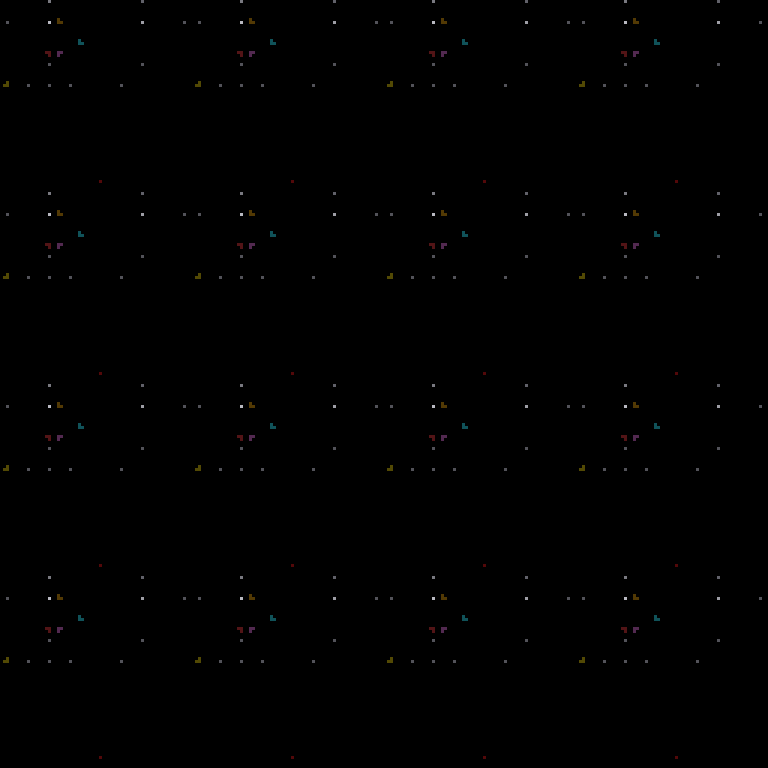

In [5]:
# Show initial state using save_batch_examples with return_bytes
from IPython.display import display, Image as IPImage

path, img_bytes = env.save_batch_examples(
    pixels=td["pixels"],
    num=16,
    scale=3,
    out_dir="./outputs",
    filename_prefix=f"{ENV_NAME.lower().replace('-', '_')}_initial",
    return_bytes=True,
)

print(f"Initial state saved to: {path}")
display(IPImage(data=img_bytes))


## 7. Visualize Environment Over Time (GIF)
Run several steps and create an animated GIF showing environment evolution.

Using the built-in `save_batch_gif()` method for easy GIF creation.


In [6]:
# Create GIF using the environment's built-in method
# scale=2 makes the GIF 2x larger for better visibility
path, gif_bytes = env.save_batch_gif(
    num_steps=100,        # Run 100 environment steps
    frame_interval=2,     # Capture every 2 steps
    num=16,               # Show 16 environments in grid
    scale=2,              # 2x scale for larger output
    duration_ms=50,       # 50ms per frame
    out_dir="./outputs",
    filename_prefix=f"{ENV_NAME.lower().replace("-", "_")}_animation",
    return_bytes=True,    # Return bytes for notebook display
)

print(f"GIF saved to: {path}")
display(IPImage(data=gif_bytes, format='gif'))


RuntimeError: Expected a 'cpu' device type for generator but found 'cuda'

## 8. Run Benchmark

In [7]:
# Reset for benchmark
td = env.reset()

total_reward = 0.0
start_time = time.time()

print(f"Running {NUM_STEPS} steps with {NUM_SCENES} parallel environments...")

for step in range(NUM_STEPS):
    # Sample random actions
    td["action"] = env.action_spec.rand()

    # Step the environment
    td = env.step(td)

    # Accumulate reward
    total_reward += td["next", "reward"].sum().item()

    # Move to next state
    td = td["next"]

    # Progress indicator
    if (step + 1) % 25 == 0:
        print(f"  Step {step + 1}/{NUM_STEPS}")

elapsed = time.time() - start_time
total_frames = NUM_STEPS * NUM_SCENES
fps = total_frames / max(elapsed, 1e-6)

print(f"\n{'=' * 50}")
print(f"Results:")
print(f"  Steps: {NUM_STEPS}")
print(f"  Total frames: {total_frames:,}")
print(f"  Total reward: {total_reward:,.0f}")
print(f"  Time: {elapsed:.2f}s")
print(f"  FPS: {fps:,.0f}")
print(f"{'=' * 50}")

Running 100 steps with 4098 parallel environments...


RuntimeError: Expected a 'cpu' device type for generator but found 'cuda'

## 9. Visualize Final State

In [ ]:
if "pixels" in td.keys():
    path, img_bytes = env.save_batch_examples(
        pixels=td["pixels"],
        num=16,
        scale=3,
        filename_prefix=f"{ENV_NAME.lower().replace('-', '_')}_final",
        return_bytes=True,
    )
    print("Final State (after random actions):")
    display(IPImage(data=img_bytes))


## 10. Run a Longer Episode and Track Rewards

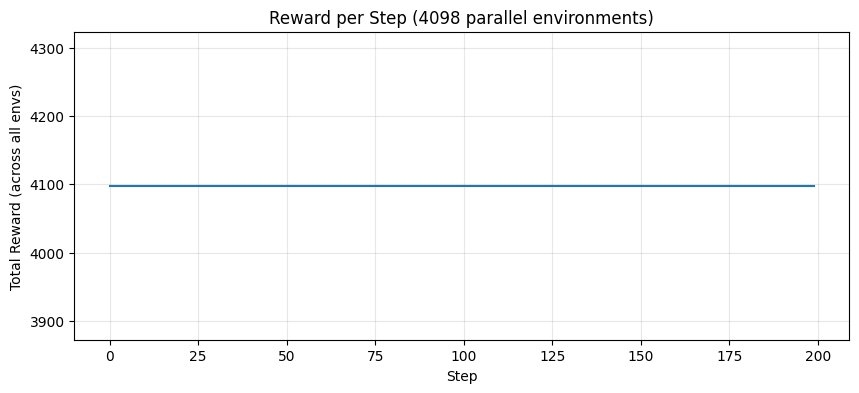

Average reward per step: 4098.0
Total reward: 819600


In [ ]:
# Reset and track rewards over time
td = env.reset()
rewards_per_step = []

NUM_TRACKING_STEPS = 200

for step in range(NUM_TRACKING_STEPS):
    td["action"] = env.action_spec.rand()
    td = env.step(td)

    step_reward = td["next", "reward"].sum().item()
    rewards_per_step.append(step_reward)

    td = td["next"]

# Plot rewards
plt.figure(figsize=(10, 4))
plt.plot(rewards_per_step)
plt.xlabel("Step")
plt.ylabel("Total Reward (across all envs)")
plt.title(f"Reward per Step ({NUM_SCENES} parallel environments)")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Average reward per step: {np.mean(rewards_per_step):.1f}")
print(f"Total reward: {np.sum(rewards_per_step):.0f}")

## 11. Scaling Test

Test how FPS scales with different numbers of scenes.
Since Panda3D's ShowBase is a singleton (one per process), we create a standalone benchmark script and run it in separate subprocesses for each configuration.


In [ ]:
# Create a standalone benchmark script using %%writefile magic
%%writefile benchmark_scaling.py
#!/usr/bin/env python3
"""Standalone benchmark script for scaling tests."""
import argparse
import time
import json

import pybatchrender as pbr


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--num-scenes", type=int, required=True)
    parser.add_argument("--steps", type=int, default=100)
    parser.add_argument("--env", type=str, default="CartPole-v0")
    parser.add_argument("--tile-resolution", type=int, default=64)
    args = parser.parse_args()

    # Create environment
    env = pbr.envs.make(
        args.env,
        num_scenes=args.num_scenes,
        tile_resolution=(args.tile_resolution, args.tile_resolution),
        offscreen=True,
        render=True,
    )

    # Warmup
    td = env.reset()
    for _ in range(5):
        td["action"] = env.action_spec.rand()
        td = env.step(td)
        td = td["next"]

    # Benchmark
    td = env.reset()
    start = time.time()
    for _ in range(args.steps):
        td["action"] = env.action_spec.rand()
        td = env.step(td)
        td = td["next"]
    elapsed = time.time() - start

    fps = (args.steps * args.num_scenes) / elapsed

    # Output as JSON for easy parsing
    result = {
        "num_scenes": args.num_scenes,
        "steps": args.steps,
        "elapsed": elapsed,
        "fps": fps,
    }
    print(json.dumps(result))


if __name__ == "__main__":
    main()

Writing benchmark_scaling.py


Run the benchmark script for different scene counts:


In [ ]:
import subprocess
import json

# Scene counts to test
SCENE_COUNTS = [64, 128, 256, 512, 1024, 2048, 4096]
STEPS = 100
DEBUG = False  # Set to True to see full subprocess output

results = []

print("Running scaling benchmark...")
print(f"Scene counts: {SCENE_COUNTS}")
print(f"Steps per test: {STEPS}")
print("-" * 50)

for num_scenes in SCENE_COUNTS:
    print(f"Testing {num_scenes:>5} scenes... ", end="", flush=True)

    try:
        # Run benchmark in subprocess (fresh Panda3D instance each time)
        result = subprocess.run(
            ["python", "benchmark_scaling.py",
             "--num-scenes", str(num_scenes),
             "--steps", str(STEPS)],
            capture_output=True,
            text=True,
            timeout=120,
        )

        if result.returncode == 0:
            # Find the JSON line in output (last line starting with '{')
            output_lines = result.stdout.strip().split('\n')
            json_line = None
            for line in reversed(output_lines):
                if line.strip().startswith('{'):
                    json_line = line.strip()
                    break

            if json_line:
                data = json.loads(json_line)
                fps = data["fps"]
                results.append((num_scenes, fps))
                print(f"FPS: {fps:>10,.0f}")
            else:
                print(f"No JSON output found")
                if DEBUG or not result.stdout:
                    print(f"  stdout: {result.stdout[:500] if result.stdout else '(empty)'}")
                    print(f"  stderr: {result.stderr[:500] if result.stderr else '(empty)'}")
        else:
            print(f"Error (exit {result.returncode})")
            print(f"  stdout: {result.stdout[:300] if result.stdout else '(empty)'}")
            print(f"  stderr: {result.stderr[:300] if result.stderr else '(empty)'}")

    except subprocess.TimeoutExpired:
        print("Timeout!")
    except Exception as e:
        print(f"Error: {e}")

print("-" * 50)
print(f"Completed {len(results)} / {len(SCENE_COUNTS)} tests")


Running scaling benchmark...
Scene counts: [64, 128, 256, 512, 1024, 2048, 4096]
Steps per test: 100
--------------------------------------------------
Testing    64 scenes... FPS:     28,185
Testing   128 scenes... FPS:     54,526
Testing   256 scenes... FPS:    106,127
Testing   512 scenes... FPS:    201,167
Testing  1024 scenes... FPS:    368,826
Testing  2048 scenes... FPS:    644,614
Testing  4096 scenes... FPS:    980,562
--------------------------------------------------
Completed 7 / 7 tests


Plot the scaling results.


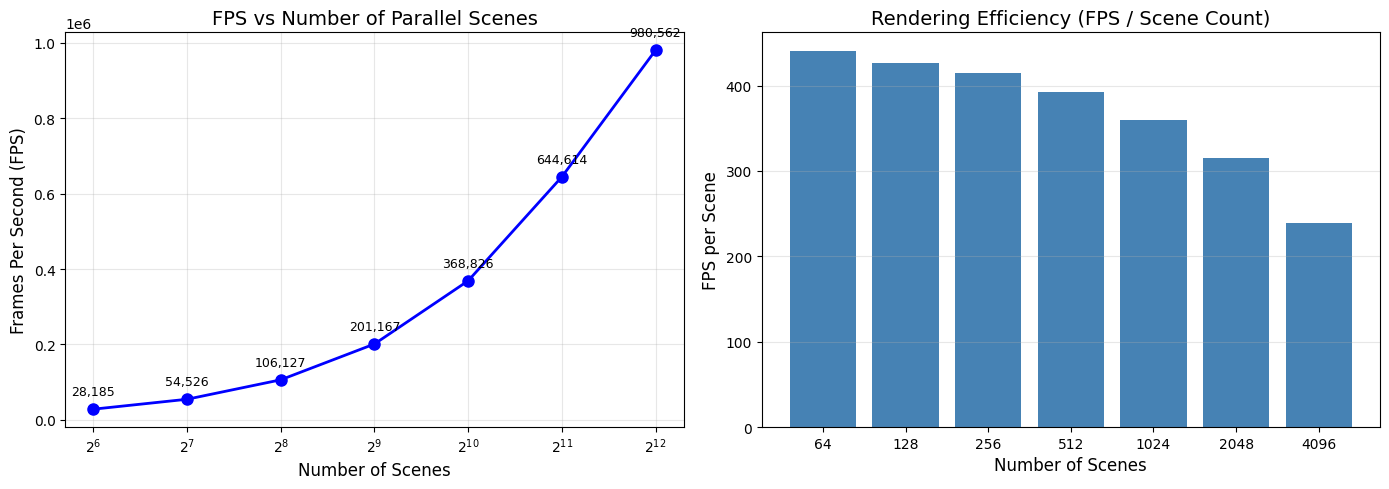


Scaling Summary:
  Scenes |          FPS |  FPS/Scene
-----------------------------------
      64 |       28,185 |      440.4
     128 |       54,526 |      426.0
     256 |      106,127 |      414.6
     512 |      201,167 |      392.9
    1024 |      368,826 |      360.2
    2048 |      644,614 |      314.8
    4096 |      980,562 |      239.4


In [ ]:
if results:
    scene_counts, fps_values = zip(*results)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: FPS vs Scene Count
    axes[0].plot(scene_counts, fps_values, 'bo-', linewidth=2, markersize=8)
    axes[0].set_xlabel("Number of Scenes", fontsize=12)
    axes[0].set_ylabel("Frames Per Second (FPS)", fontsize=12)
    axes[0].set_title("FPS vs Number of Parallel Scenes", fontsize=14)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xscale('log', base=2)

    # Add value labels
    for x, y in zip(scene_counts, fps_values):
        axes[0].annotate(f'{y:,.0f}', (x, y), textcoords="offset points",
                        xytext=(0, 10), ha='center', fontsize=9)

    # Plot 2: FPS per Scene (efficiency)
    fps_per_scene = [fps / n for n, fps in results]
    axes[1].bar(range(len(scene_counts)), fps_per_scene, color='steelblue')
    axes[1].set_xticks(range(len(scene_counts)))
    axes[1].set_xticklabels([str(n) for n in scene_counts])
    axes[1].set_xlabel("Number of Scenes", fontsize=12)
    axes[1].set_ylabel("FPS per Scene", fontsize=12)
    axes[1].set_title("Rendering Efficiency (FPS / Scene Count)", fontsize=14)
    axes[1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # Print summary
    print("\nScaling Summary:")
    print(f"{'Scenes':>8} | {'FPS':>12} | {'FPS/Scene':>10}")
    print("-" * 35)
    for (n, fps), fps_per in zip(results, fps_per_scene):
        print(f"{n:>8} | {fps:>12,.0f} | {fps_per:>10.1f}")
else:
    print("No results to plot. Run the benchmark cell above first.")


## 12. Parallel Environments Benchmark

Test performance with multiple worker processes using `make_parallel()`.
Each worker has its own Panda3D renderer, allowing true parallelism.


In [ ]:
# Create a standalone parallel benchmark script
%%writefile benchmark_parallel.py
#!/usr/bin/env python3
"""Standalone benchmark script for parallel environments."""
import argparse
import time
import json

import pybatchrender as pbr


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--num-workers", type=int, required=True)
    parser.add_argument("--num-scenes", type=int, default=256)
    parser.add_argument("--steps", type=int, default=100)
    parser.add_argument("--tile-resolution", type=int, default=64)
    parser.add_argument("--env", type=str, default="CartPole-v0")
    args = parser.parse_args()

    # Create parallel environment
    env = pbr.envs.make_parallel(
        args.env,
        num_workers=args.num_workers,
        num_scenes=args.num_scenes,
        tile_resolution=(args.tile_resolution, args.tile_resolution),
        offscreen=True,
        render=True,
    )

    total_scenes = args.num_workers * args.num_scenes

    # Warmup
    td = env.reset()
    for _ in range(3):
        td = td.clone()
        td["action"] = env.action_spec.rand()
        td = env.step(td)
        td = td["next"]

    # Benchmark
    td = env.reset()
    start = time.time()
    for _ in range(args.steps):
        td = td.clone()
        td["action"] = env.action_spec.rand()
        td = env.step(td)
        td = td["next"]
    elapsed = time.time() - start

    fps = (args.steps * total_scenes) / elapsed

    env.close()

    # Output as JSON
    result = {
        "num_workers": args.num_workers,
        "num_scenes": args.num_scenes,
        "total_scenes": total_scenes,
        "steps": args.steps,
        "elapsed": elapsed,
        "fps": fps,
    }
    print(json.dumps(result))


if __name__ == "__main__":
    main()


Writing benchmark_parallel.py


Run the parallel benchmark with different worker counts.


In [ ]:
import subprocess
import json

# Worker counts to test
WORKER_COUNTS = [1, 2, 4]
SCENES_PER_WORKER = 256
STEPS = 50

parallel_results = []

print("Running parallel environments benchmark...")
print(f"Worker counts: {WORKER_COUNTS}")
print(f"Scenes per worker: {SCENES_PER_WORKER}")
print(f"Steps per test: {STEPS}")
print("-" * 60)

for num_workers in WORKER_COUNTS:
    total_scenes = num_workers * SCENES_PER_WORKER
    print(f"Testing {num_workers} workers ({total_scenes} total scenes)... ", end="", flush=True)

    try:
        result = subprocess.run(
            ["python", "benchmark_parallel.py",
             "--num-workers", str(num_workers),
             "--num-scenes", str(SCENES_PER_WORKER),
             "--steps", str(STEPS)],
            capture_output=True,
            text=True,
            timeout=180,
        )

        if result.returncode == 0:
            # Find JSON line
            output_lines = result.stdout.strip().split('\n')
            json_line = None
            for line in reversed(output_lines):
                if line.strip().startswith('{'):
                    json_line = line.strip()
                    break

            if json_line:
                data = json.loads(json_line)
                fps = data["fps"]
                parallel_results.append((num_workers, total_scenes, fps))
                print(f"FPS: {fps:>10,.0f}")
            else:
                print("No JSON output")
                print(f"  stdout: {result.stdout[:300] if result.stdout else '(empty)'}")
        else:
            print(f"Error (exit {result.returncode})")
            print(f"  stderr: {result.stderr[:300] if result.stderr else '(empty)'}")

    except subprocess.TimeoutExpired:
        print("Timeout!")
    except Exception as e:
        print(f"Error: {e}")

print("-" * 60)
print(f"Completed {len(parallel_results)} / {len(WORKER_COUNTS)} tests")


Running parallel environments benchmark...
Worker counts: [1, 2, 4]
Scenes per worker: 256
Steps per test: 50
------------------------------------------------------------
Testing 1 workers (256 total scenes)... FPS:     74,502
Testing 2 workers (512 total scenes)... FPS:    139,918
Testing 4 workers (1024 total scenes)... FPS:    234,306
------------------------------------------------------------
Completed 3 / 3 tests


Plot the parallel scaling results.


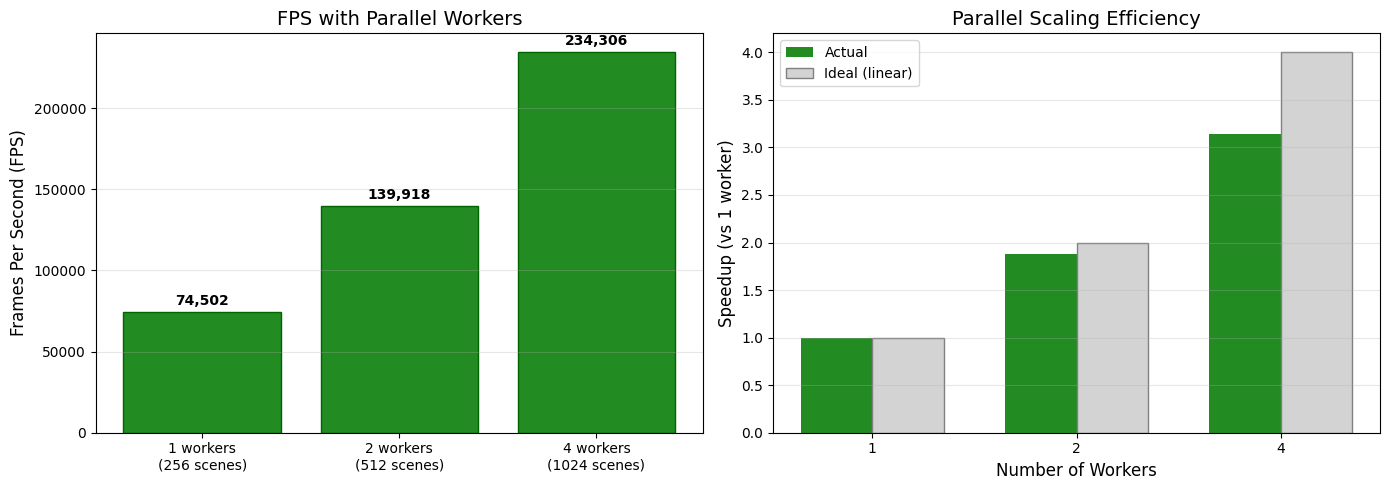


Parallel Scaling Summary:
 Workers | Total Scenes |          FPS |  Speedup
--------------------------------------------------
       1 |          256 |       74,502 |     1.00x
       2 |          512 |      139,918 |     1.88x
       4 |         1024 |      234,306 |     3.14x


In [ ]:
if parallel_results:
    workers, total_scenes_list, fps_values = zip(*parallel_results)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: FPS vs Workers
    axes[0].bar(range(len(workers)), fps_values, color='forestgreen', edgecolor='darkgreen')
    axes[0].set_xticks(range(len(workers)))
    axes[0].set_xticklabels([f"{w} workers\n({w*SCENES_PER_WORKER} scenes)" for w in workers])
    axes[0].set_ylabel("Frames Per Second (FPS)", fontsize=12)
    axes[0].set_title("FPS with Parallel Workers", fontsize=14)
    axes[0].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, fps in enumerate(fps_values):
        axes[0].annotate(f'{fps:,.0f}', (i, fps), textcoords="offset points",
                        xytext=(0, 5), ha='center', fontsize=10, fontweight='bold')

    # Plot 2: Speedup vs Workers
    baseline_fps = fps_values[0]
    speedups = [fps / baseline_fps for fps in fps_values]
    ideal_speedups = [w / workers[0] for w in workers]

    x = range(len(workers))
    width = 0.35
    axes[1].bar([i - width/2 for i in x], speedups, width, label='Actual', color='forestgreen')
    axes[1].bar([i + width/2 for i in x], ideal_speedups, width, label='Ideal (linear)', color='lightgray', edgecolor='gray')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels([str(w) for w in workers])
    axes[1].set_xlabel("Number of Workers", fontsize=12)
    axes[1].set_ylabel("Speedup (vs 1 worker)", fontsize=12)
    axes[1].set_title("Parallel Scaling Efficiency", fontsize=14)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # Print summary
    print("\nParallel Scaling Summary:")
    print(f"{'Workers':>8} | {'Total Scenes':>12} | {'FPS':>12} | {'Speedup':>8}")
    print("-" * 50)
    for (w, ts, fps), speedup in zip(parallel_results, speedups):
        print(f"{w:>8} | {ts:>12} | {fps:>12,.0f} | {speedup:>8.2f}x")
else:
    print("No results to plot. Run the parallel benchmark cell above first.")

## 13. Onscreen Rendering (Interactive Window)

By default, environments render offscreen (no window). To show a live window,
set `offscreen=False`. This is useful for debugging and visualization.

**Note**: Onscreen rendering doesn't work in Colab/Jupyter. Run the generated
script locally instead.

In [ ]:
# Create a standalone onscreen demo script
%%writefile demo_onscreen.py
#!/usr/bin/env python3
"""
Demo script for onscreen (windowed) rendering.

Run this script locally (not in Colab/Jupyter) to see a live window:
    python demo_onscreen.py

Press Ctrl+C to stop.
"""
import time
import argparse
import pybatchrender as pbr


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--env", type=str, default="CartPole-v0")
    args = parser.parse_args()
    print(f"Creating onscreen {args.env} environment...")
    print("A window should appear showing the rendered scenes.")
    print("Press Ctrl+C to stop.\n")

    # Create environment with onscreen rendering
    # Use fewer scenes for better visibility in the window
    env = pbr.envs.make(
        args.env,
        num_scenes=16,              # 4x4 grid of scenes
        tile_resolution=(128, 128), # Larger tiles for visibility
        offscreen=False,            # Show window!
        render=True,
        report_fps=True,            # Show FPS in console
    )

    print(f"Window size: {env.cfg.window_resolution}")
    print(f"Scenes: {env.cfg.num_scenes} ({env.cfg.tiles[0]}x{env.cfg.tiles[1]} grid)")
    print(f"Tile resolution: {env.cfg.tile_resolution}")
    print()

    # Reset and run
    td = env.reset()
    step = 0

    try:
        while True:
            # Random actions
            td["action"] = env.action_spec.rand()
            td = env.step(td)
            td = td["next"]
            step += 1

            # Small delay for visibility (remove for max FPS)
            time.sleep(0.01)

    except KeyboardInterrupt:
        print(f"\nStopped after {step} steps.")


if __name__ == "__main__":
    main()

Writing demo_onscreen.py


In [ ]:
# Uncomment the following to run in your local environment
# NOTE: You will get an error in Colab, as it can't open an onscreen window

# !python demo_onscreen.py

To run the onscreen demo locally:
```bash
python demo_onscreen.py
```

Key differences for onscreen mode:
- `offscreen=False` — opens a live window
- Use fewer scenes (e.g., 16–64) for better visibility
- Use larger tile resolution (e.g., 128×128) so you can see details

## 14. Get Environment Classes

 You can also access the underlying classes for custom configurations.

In [ ]:
# Get the raw classes
EnvCls, RendererCls, ConfigCls = pbr.envs.get_env_classes(ENV_NAME)

print(f"Environment class: {EnvCls.__name__}")
print(f"Renderer class: {RendererCls.__name__}")
print(f"Config class: {ConfigCls.__name__}")

# Inspect available config options
print(f"\nConfig fields:")
import dataclasses
for field in dataclasses.fields(ConfigCls):
    print(f"  {field.name}: {field.type} = {field.default}")

Environment class: CartPoleEnv
Renderer class: CartPoleRenderer
Config class: CartPoleConfig

Config fields:
  offscreen: <class 'bool'> = True
  num_scenes: int | None = None
  tiles: tuple[int, int] | int | None = None
  tile_resolution: tuple[int, int] | None = (64, 64)
  window_resolution: tuple[int, int] | None = None
  num_channels: <class 'int'> = 3
  batch_inner_dim: int | None = None
  clip_camera: tuple[float, float] = (3.0, 500.0)
  min_objects: int = 50
  max_objects: int = 100
  device: str | None = None
  panda3d_backend: str | None = arm
  log_level: int = 10
  extra_prc_file_data: str = audio-library-name null
textures-power-2 none
sync-video 0

  render_mode: str = rgb_array
  dt: float = 0.016666666666666666
  warmup_steps: int = 5
  report_fps: <class 'bool'> = False
  report_fps_interval: float = 1.0
  manual_camera_control: bool = False
  cuda_gl_interop: bool = True
  interactive: bool = False
  direct_obs_dim: int | None = 4
  action_n: int | None = 2
  action_ty

## Summary

This notebook demonstrated:

1. **Environment Registry**: `pbr.envs.make("CartPole-v0", ...)` for easy creation
2. **Batch Rendering**: Running 100s-1000s of parallel environments
3. **TorchRL Integration**: Using TensorDict for observations and actions
4. **Performance Scaling**: How FPS scales with scene count
5. **Parallel Workers**: Using `make_parallel()` for multi-process rendering
6. **Onscreen Mode**: Live window with `offscreen=False`

Key APIs:
```python
# Single process, offscreen (default)
env = pbr.envs.make("CartPole-v0", num_scenes=1024)

# Single process, onscreen (with window)
env = pbr.envs.make("CartPole-v0", num_scenes=16, offscreen=False)

# Multi-process (parallel workers)
env = pbr.envs.make_parallel("CartPole-v0", num_workers=4, num_scenes=256)
```
